In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta

/Users/brandonamarasingam/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [20]:
def fetch_pool_prices(pool_address, minutes = 400):
    end_timestamp = datetime.utcnow()
    start_timestamp = end_timestamp - timedelta(minutes = minutes)

    query = """{swaps(where:{pool: "%s", timestamp_gte: %d,
    timestamp_lte: %d},
    orderBy: timestamp, orderDirection: asc){
    timestamp
    amount0 
    amount1 
    }}""" % (pool_address, start_timestamp.timestamp(), end_timestamp.timestamp())

    url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3'
    response = requests.post(url, json={'query': query})
    data = response.json()

    swaps = data.get('data',()).get('swaps', [])

    df = pd.DataFrame(swaps)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s') #Change from UNIX to datetime
    df['price'] = abs(df['amount1'].astype(float)/df['amount0'].astype(float))

    return df

In [21]:
pool_address = '0x7baecE5d47f1BC5E1953FBE0E9931D54DAB6D810'.lower() #$TURBO/WETH pool address
fetch_pool_prices(pool_address)

/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_21099/1576924350.py:20: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s') #Change from UNIX to datetime


,timestamp,amount0,amount1,price_usd
0,2024-06-25 14:28:11,-796491.138049010283490579,1.308422653182415386,0.000002
1,2024-06-25 14:29:23,-595572.90024415104639868,0.980905970685600323,0.000002
2,2024-06-25 14:29:35,-528852.039341700367589255,0.872844218725727641,0.000002
3,2024-06-25 14:30:47,-1156820.990098732171770871,1.915293469748544646,0.000002
4,2024-06-25 14:30:59,-35376.545098939225622978,0.05870182914369349,0.000002
5,2024-06-25 14:39:23,1336821.112119810832810149,-2.168878597597740468,0.000002
6,2024-06-25 14:40:35,822038.698561922012071046,-1.328379281965623956,0.000002
7,2024-06-25 14:40:47,80000,-0.129061596165096028,0.000002
8,2024-06-25 14:46:47,80258.11239475988995549,-0.129439754749390219,0.000002
9,2024-06-25 14:47:59,217832.160249901664777718,-0.35112532078556447,0.000002


In [22]:
def fetch_pool_prices_pagi(pool_address, minutes = 400):
    end_timestamp = datetime.utcnow()
    start_timestamp = end_timestamp - timedelta(minutes = minutes)

    url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3'

    all_swaps = [] #Will store all iterations of queries
    last_id = "" 

    while True:
        query = """{swaps(first:100,where:{pool: "%s", timestamp_gte: %d,
        timestamp_lte: %d, id_gt: "%s"},
        orderBy: id, orderDirection: asc){
        id
        timestamp
        amount0 
        amount1 
        }}""" % (pool_address, start_timestamp.timestamp(), end_timestamp.timestamp(), last_id)

        response = requests.post(url, json={'query': query})
        data = response.json()
        swaps = data.get('data',()).get('swaps', [])
        if not swaps:
            break
        all_swaps.extend(swaps)
        last_id = swaps[-1]['id']

        if len(swaps) < 100:
            break
       
    df = pd.DataFrame(all_swaps)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s') #Change from UNIX to datetime
    df['price'] = abs(df['amount1'].astype(float)/df['amount0'].astype(float))

    return df

/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_21099/2165689512.py:32: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s') #Change from UNIX to datetime


<Axes: xlabel='timestamp'>

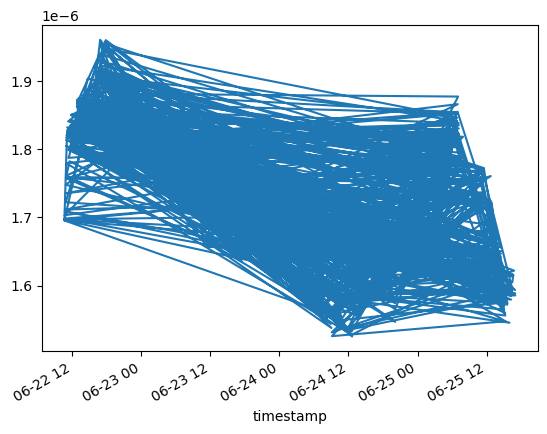

In [24]:
df_x = fetch_pool_prices_pagi(pool_address,minutes=5000)

df_x.set_index('timestamp').price.plot()